In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, BatchNormalization , Dropout
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers


In [2]:
zf = zipfile.ZipFile('/content/dataset.zip')
zf.extractall('/content')
zf.close()

In [3]:
train = keras.utils.image_dataset_from_directory(
    directory = '/content/forest_fire/Training and Validation',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

test = keras.utils.image_dataset_from_directory(
    directory = '/content/forest_fire/Testing',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 1832 files belonging to 2 classes.
Found 68 files belonging to 2 classes.


In [4]:
def process(img, lab):
    img = tf.cast(img/255., tf.float32)
    return img , lab
train = train.map(process)
test = test.map(process)

In [5]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides = 2 , pool_size = (2,2),padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides = 2 , pool_size = (2,2),padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides = 2 , pool_size = (2,2),padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(strides = 2 , pool_size = (2,2),padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,461,441 (13.20 MB)

 Trainable params: 3,460,993 (13.20 MB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3 ,restore_best_weights=True )

In [8]:
history = model.fit(train, epochs = 20 , validation_data = test , callbacks = [early_stopping])

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 27s 222ms/step - accuracy: 0.8015 - loss: 1.7638 - val_accuracy: 0.3235 - val_loss: 2.4861
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.9391 - loss: 0.2155 - val_accuracy: 0.3235 - val_loss: 1.6906
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9457 - loss: 0.1654 - val_accuracy: 0.5294 - val_loss: 0.7185
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9587 - loss: 0.1422 - val_accuracy: 0.6618 - val_loss: 0.5476
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9567 - loss: 0.1361 - val_accuracy: 0.4853 - val_loss: 0.8629
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9691 - loss: 0.0818 - val_accuracy: 0.6176 - val_loss: 0.7370
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.9772 - loss: 0.0667 - val_accuracy: 0.7353 - val_loss: 0.5400
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9747 - loss: 0.1130 - val_accuracy: 0.7500 

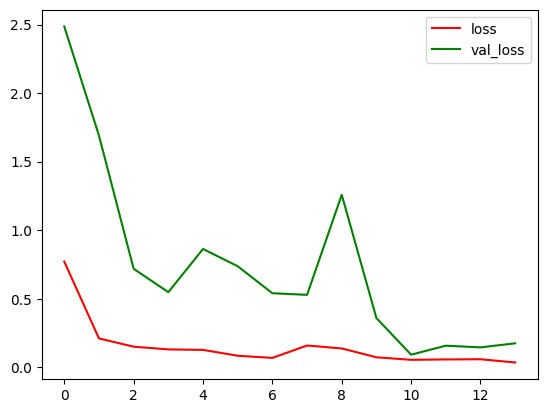

In [9]:
plt.plot(history.history['loss'],label = 'loss' , color = 'red')
plt.plot(history.history['val_loss'],label = 'val_loss' , color = 'green')
plt.legend()
plt.show()

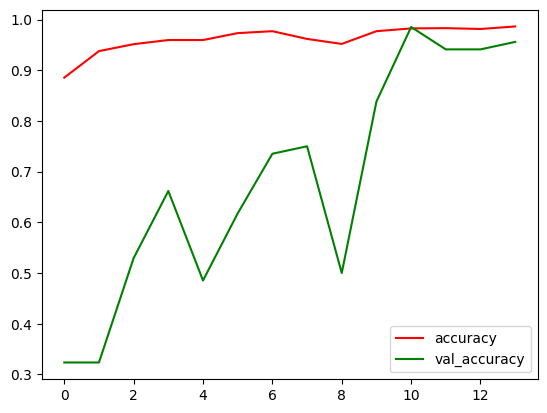

In [10]:
plt.plot(history.history['accuracy'],label = 'accuracy', color = 'red')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy', color = 'green')
plt.legend()
plt.show()

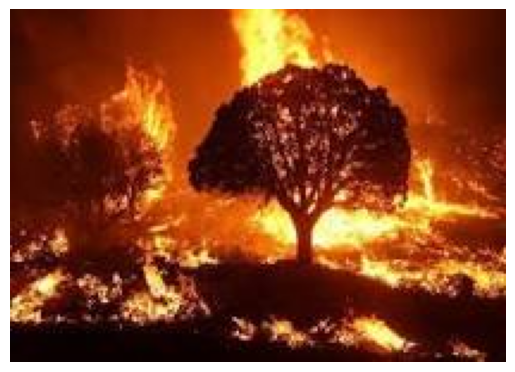

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step
Prediction: Fire (Probability: 0.00)


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the model (if it’s saved)
# model = load_model('path_to_your_model.h5')

# Load and preprocess the image
test_img2 = cv2.imread('/content/aag.jpeg')
test_img2 = cv2.cvtColor(test_img2, cv2.COLOR_BGR2RGB)
plt.imshow(test_img2)
plt.axis('off')
plt.show()

# Resize and reshape for the model
test_img2 = cv2.resize(test_img2, (256, 256))
test_img2 = test_img2.reshape((1, 256, 256, 3))
test_img2 = test_img2 / 255.0  # Normalize the image

# Make prediction
prediction = model.predict(test_img2)[0][0]  # Assuming sigmoid activation in the output layer

# Interpret the prediction
if prediction >= 0.5:
    result = "No Fire"  # Probabilities close to 1 mean "No Fire"
else:
    result = "Fire"  # Probabilities close to 0 mean "Fire"

print(f"Prediction: {result} (Probability: {prediction:.2f})")


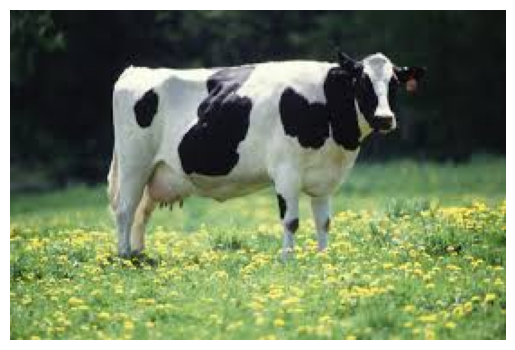

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: No Fire (Probability: 0.93)


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the model (if it’s saved)
# model = load_model('path_to_your_model.h5')

# Load and preprocess the image
test_img2 = cv2.imread('/content/cow.jpeg')
test_img2 = cv2.cvtColor(test_img2, cv2.COLOR_BGR2RGB)
plt.imshow(test_img2)
plt.axis('off')
plt.show()

# Resize and reshape for the model
test_img2 = cv2.resize(test_img2, (256, 256))
test_img2 = test_img2.reshape((1, 256, 256, 3))
test_img2 = test_img2 / 255.0  # Normalize the image

# Make prediction
prediction = model.predict(test_img2)[0][0]  # Assuming sigmoid activation in the output layer

# Interpret the prediction
if prediction >= 0.5:
    result = "No Fire"  # Probabilities close to 1 mean "No Fire"
else:
    result = "Fire"  # Probabilities close to 0 mean "Fire"

print(f"Prediction: {result} (Probability: {prediction:.2f})")


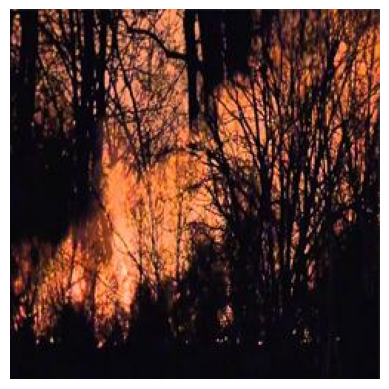

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: Fire (Probability: 0.02)


In [13]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the model (if it’s saved)
# model = load_model('path_to_your_model.h5')

# Load and preprocess the image
test_img2 = cv2.imread('/content/forest_fire/Testing/fire/abc189.jpg')
test_img2 = cv2.cvtColor(test_img2, cv2.COLOR_BGR2RGB)
plt.imshow(test_img2)
plt.axis('off')
plt.show()

# Resize and reshape for the model
test_img2 = cv2.resize(test_img2, (256, 256))
test_img2 = test_img2.reshape((1, 256, 256, 3))
test_img2 = test_img2 / 255.0  # Normalize the image

# Make prediction
prediction = model.predict(test_img2)[0][0]  # Assuming sigmoid activation in the output layer

# Interpret the prediction
if prediction >= 0.5:
    result = "No Fire"  # Probabilities close to 1 mean "No Fire"
else:
    result = "Fire"  # Probabilities close to 0 mean "Fire"

print(f"Prediction: {result} (Probability: {prediction:.2f})")


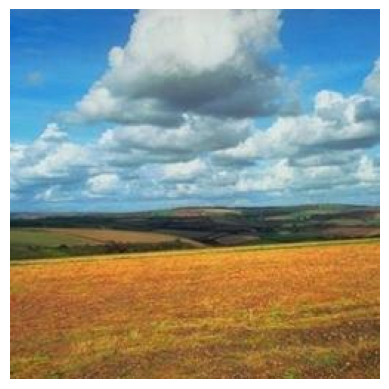

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: Fire (Probability: 0.50)


In [14]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the model (if it’s saved)
# model = load_model('path_to_your_model.h5')

# Load and preprocess the image
test_img2 = cv2.imread('/content/forest_fire/Testing/nofire/abc352.jpg')
test_img2 = cv2.cvtColor(test_img2, cv2.COLOR_BGR2RGB)
plt.imshow(test_img2)
plt.axis('off')
plt.show()

# Resize and reshape for the model
test_img2 = cv2.resize(test_img2, (256, 256))
test_img2 = test_img2.reshape((1, 256, 256, 3))
test_img2 = test_img2 / 255.0  # Normalize the image

# Make prediction
prediction = model.predict(test_img2)[0][0]  # Assuming sigmoid activation in the output layer

# Interpret the prediction
if prediction >= 0.5:
    result = "No Fire"  # Probabilities close to 1 mean "No Fire"
else:
    result = "Fire"  # Probabilities close to 0 mean "Fire"

print(f"Prediction: {result} (Probability: {prediction:.2f})")


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()


train_generator = datagen.flow_from_directory("/content/forest_fire/Training and Validation")


print(train_generator.class_indices)


Found 1832 images belonging to 2 classes.
{'fire': 0, 'nofire': 1}


In [18]:
model.save('fire_detector.h5')